In [1]:
import random
import copy


$y=mx+c$

== Sol ==
m = 1.330457075236957
c = -1.1623187255255252


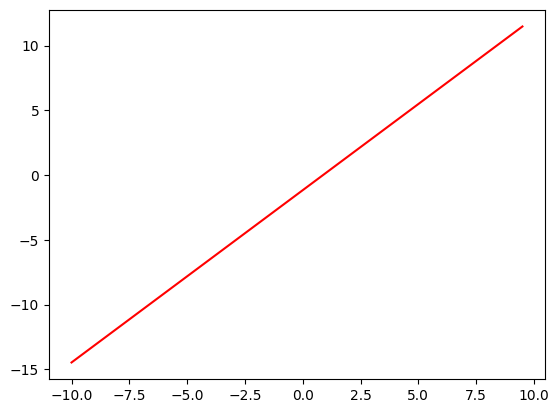

In [2]:
import matplotlib.pyplot as plt
import numpy as np

m_sol = random.random()*5-2.5
c_sol = random.random()*5-2.5
print('== Sol ==')
print('m =',m_sol)
print('c =',c_sol)

x=np.arange(-10,10,0.5)
y=m_sol*x+c_sol

plt.plot(x,y,'r')

# Extra

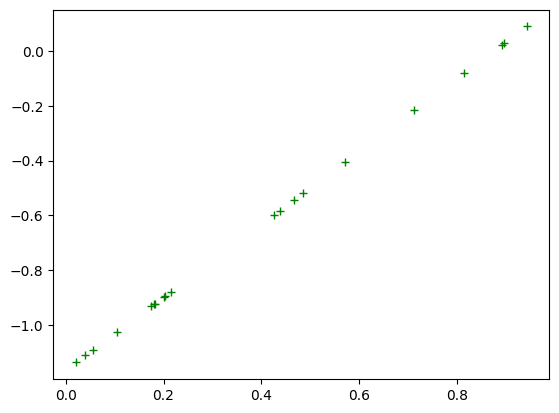

In [3]:
import random
Data=np.random.rand(20,2)
Data[:,1]=m_sol*Data[:,0]+c_sol+(random.random()/10-0.05)
plt.plot(Data[:,0],Data[:,1],'g+')

# GA to Fit Curve mx+c

Try to fit `y=mx+c`

population:

[m1,c1]
[m2,c2]

In [4]:
import random
import numpy as np

m_sol=random.random()*10-5
c_sol=random.random()*10-5
m_sol,c_sol

(-3.031390935003694, -4.390139609825533)

In [5]:
def mutation(population):
  mutated = []
  for pop in population:
    p = random.random()
    if p > 0.5:
      mutated.append([pop[0]+random.random()*5-2.5,pop[1]])
    else:
      mutated.append([pop[0],pop[1]+random.random()*5-2.5])
  return mutated

def cross_over(population):
  return [[population[0][0],population[1][1]],[population[1][0],population[0][1]]]

def fitness(param,n):
  m = param[0]
  c = param[1]
  xs = [random.random()*10-5 for i in range(5)]
  ys_hat = np.array([m*xs[i]+c for i in range(5)])
  ys_actual = np.array([m_sol*xs[i]+c_sol for i in range(5)])
  return (ys_hat-ys_actual).dot((ys_hat-ys_actual).T)

def selection(population,n):
  unique_pop = []
  for pop in population:
    if pop not in unique_pop:
      unique_pop.append(pop)
  population = unique_pop
  find_fitness = [(fitness(pop,n),pop) for pop in population]
  find_fitness.sort()
  # print(find_fitness)
  return find_fitness[0],[p for f,p in find_fitness[:2]]

def is_better(p1,p2):
  if len(p2) == 0 or p1[0] <= p2[0]:
    return True
  return False

def show_pop(population):
  for pop in population:
    print(pop)

In [6]:
n = 2

population = [[int(random.random()*10-5) for i in range(n)]]
population += [[int(random.random()*10-5) for i in range(n)]]
print(population)
mutated = mutation(population)
print(mutated)
crossovered = cross_over(population)
print(crossovered)

[[-2, -2], [3, -2]]
[[-0.8017742296462114, -2], [3, -0.9240254269152826]]
[[-2, -2], [3, -2]]


In [7]:
n = 2
for i in range(30): # ทำ 30 ครั้ง
  population = [[random.random()*2*n-n for i in range(n)]]
  population += [[random.random()*2*n-n for i in range(n)]]

  print('Start')
  print(population)
  print('=========')
  best_found = tuple()
  for i in range(100000):
    mutated = mutation(population)
    cross_overed = cross_over(population)
    best_pop,population = selection(population+mutated+cross_overed,n)
    if is_better(best_pop,best_found):
      best_found = best_pop
    # show_pop(population)
    if fitness(best_found[1],n) <= 1e-5:
      print('Found at generation',i)
      break
    if i % 1000 == 0:
      print(i,best_found)
      print()
  print('=====')
  print(best_found)
  print()

Start
[[0.9998115329006558, 0.9700635085648708], [0.34940180558530454, -1.2891831430650607]]
0 (379.1869631214389, [0.34940180558530454, 0.9700635085648708])

Found at generation 774
=====
(1.8213833158794166e-05, [-3.0299191049308503, -4.3915186151639105])

Start
[[1.2515378325796531, 0.5078555242266525], [-0.8346252301697992, -0.06523012079454293]]
0 (55.09166526251569, [-0.8346252301697992, -0.06523012079454293])

Found at generation 986
=====
(5.360003466104238e-06, [-3.0317162205992063, -4.389764586387891])

Start
[[-1.9391359040303202, 1.4341100780480054], [0.907190147463393, -1.7921971433947794]]
0 (30.676523263272145, [-1.9391359040303202, -1.7921971433947794])

Found at generation 437
=====
(7.188438929271404e-06, [-3.030633651221406, -4.3901914600008185])

Start
[[-1.315489409513916, -1.4700519336932292], [-0.7907624156328796, 0.8098870847904265]]
0 (90.308968125581, [-1.315489409513916, -1.4700519336932292])

1000 (1.0683950032587105e-05, [-3.034225920509242, -4.382557253122

# GA to Fit Curve $ax^2+bx+c$

This is an exercise. You can try to do it.

Try to fit $y=ax^2+bx+c$

population:

[a,b,c]
[a,b,c]

In [8]:
a_sol=random.random()*5-2.5
b_sol=random.random()*10-5
c_sol=random.random()*10-5

## Modify this part

In [9]:
def mutation(population):
  mutated = []
  for pop in population:
    p = random.random()
    if p < 0.35 :
      mutated.append([pop[0]+random.random()*5-2.5,pop[1],pop[2]])
    elif p > 0.65:
      mutated.append([pop[0],pop[1]+random.random()*5-2.5,pop[2]])
    else:
      mutated.append([pop[0],pop[1],pop[2]+random.random()*5-2.5])
  return mutated

def cross_over(population):
  q = random.random()
  if q > 0.5 :
    return [[population[0][0],population[1][1],population[1][2]],[population[1][0],population[0][1],population[0][2]]]
  else :
    return [[population[0][0],population[0][1],population[1][2]],[population[1][0],population[1][1],population[0][2]]]

def fitness(param,n):
  a = param[0]
  b = param[1]
  c = param[2]
  xs = [random.random()*10-5 for i in range(5)]
  ys_hat = np.array([a*(xs[i]**2)+b*xs[i]+c for i in range(5)])
  ys_actual = np.array([a_sol*(xs[i]**2)+b_sol*xs[i]+c_sol for i in range(5)])
  return (ys_hat-ys_actual).dot((ys_hat-ys_actual).T)

def selection(population,n):
  unique_pop = []
  for pop in population:
    if pop not in unique_pop:
      unique_pop.append(pop)
  population = unique_pop
  find_fitness = [(fitness(pop,n),pop) for pop in population]
  find_fitness.sort()
  #print(find_fitness)
  return find_fitness[0],[p for f,p in find_fitness[:2]]

def is_better(p1,p2):
  if len(p2) == 0 or p1[0] <= p2[0]:
    return True
  return False

def show_pop(population):
  for pop in population:
    print(pop)

In [10]:
n = 3

population = [[int(random.random()*10-5) for i in range(n)]]
population += [[int(random.random()*10-5) for i in range(n)]]

print(population)
mutated = mutation(population)
print(mutated)
crossovered = cross_over(population)
print(crossovered)

[[-2, 2, -3], [1, -1, -3]]
[[-2, 2.3856691184943726, -3], [1, 1.4397283220440986, -3]]
[[-2, 2, -3], [1, -1, -3]]


In [11]:
n = 3
for i in range(30):
  population = [[int(random.random()*n) for i in range(n)]]
  population += [[int(random.random()*n) for i in range(n)]]

  print('Start')
  print(population)
  print('=========')
  best_found = tuple()
  for i in range(100000):
    mutated = mutation(population)
    cross_overed = cross_over(population)
    best_pop,population = selection(population+mutated+cross_overed,n)
    if is_better(best_pop,best_found):
      best_found = best_pop
    # show_pop(population)
    if fitness(best_found[1],n) <= 1e-3:
      print('Found at generation',i)
      break
    if i % 1000 == 0:
      print(i,best_found)
      print()
  print('=====')
  print(best_found)
  print()

Start
[[2, 2, 2], [0, 1, 1]]
0 (198.51079200666538, [0, 1, 1])

Found at generation 411
=====
(0.0004210992145299958, [0.4684052110075023, 3.2407486056759227, -4.373919793079414])

Start
[[1, 0, 2], [1, 1, 1]]
0 (316.8332800895705, [1, 0, 1])

Found at generation 373
=====
(0.002896717977234946, [0.4740144396932342, 3.2187832192281984, -4.392174711100877])

Start
[[0, 2, 2], [1, 1, 0]]
0 (99.28601551115017, [1, 1, 0])

1000 (0.000596438825918967, [0.4770528412886641, 3.2377493654281686, -4.40116401439084])

Found at generation 1015
=====
(0.000596438825918967, [0.4770528412886641, 3.2377493654281686, -4.40116401439084])

Start
[[1, 0, 2], [2, 1, 2]]
0 (277.03554307462997, [1.397003710316758, 1, 2])

Found at generation 471
=====
(0.0005362841907785114, [0.47073949084007616, 3.23526085617235, -4.381252886634611])

Start
[[1, 0, 0], [2, 1, 2]]
0 (210.10146363109277, [1, 0, 0])

Found at generation 959
=====
(0.0026288999543536387, [0.4591333291038744, 3.20131705185479, -4.368500062974049

# Covid19 Thailand (12 Aug 21-25 Oct 21)

In [12]:
! wget https://data.go.th/dataset/8a956917-436d-4afd-a2d4-59e4dd8e906e/resource/026c8d31-0d51-49b7-9dc2-8373e7cef440/download/confirmed-cases-since-120864.csv

--2024-09-06 07:57:44--  https://data.go.th/dataset/8a956917-436d-4afd-a2d4-59e4dd8e906e/resource/026c8d31-0d51-49b7-9dc2-8373e7cef440/download/confirmed-cases-since-120864.csv
Resolving data.go.th (data.go.th)... 202.139.198.29
Connecting to data.go.th (data.go.th)|202.139.198.29|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228072402 (218M) [text/csv]
Saving to: ‘confirmed-cases-since-120864.csv’

confirmed-cases-sin 100%[===================>] 217.51M  13.0MB/s    in 19s     

2024-09-06 07:58:06 (11.4 MB/s) - ‘confirmed-cases-since-120864.csv’ saved [228072402/228072402]



In [13]:
import pandas as pd

df=pd.read_csv('confirmed-cases-since-120864.csv')

In [14]:
df.groupby('announce_date').count()['No.']

,No.
announce_date,
1/10/2021,11754
1/9/2021,14802
10/10/2021,10817
10/9/2021,14403
11/10/2021,10035
...,...
7/9/2021,13821
8/10/2021,11140
8/9/2021,14176


In [15]:
df['announce_date'].unique()

array(['12/8/2021', '13/8/2021', '14/8/2021', '15/8/2021', '16/8/2021',
       '17/8/2021', '18/8/2021', '19/8/2021', '20/8/2021', '21/8/2021',
       '22/8/2021', '23/8/2021', '24/8/2021', '25/8/2021', '26/8/2021',
       '27/8/2021', '28/8/2021', '29/8/2021', '30/8/2021', '31/8/2021',
       '1/9/2021', '2/9/2021', '3/9/2021', '4/9/2021', '5/9/2021',
       '6/9/2021', '7/9/2021', '8/9/2021', '9/9/2021', '10/9/2021',
       '11/9/2021', '12/9/2021', '13/9/2021', '14/9/2021', '15/9/2021',
       '16/9/2021', '17/9/2021', '18/9/2021', '19/9/2021', '20/9/2021',
       '21/9/2021', '22/9/2021', '23/9/2021', '24/9/2021', '25/9/2021',
       '26/9/2021', '27/9/2021', '28/9/2021', '29/9/2021', '30/9/2021',
       '1/10/2021', '2/10/2021', '3/10/2021', '4/10/2021', '5/10/2021',
       '6/10/2021', '7/10/2021', '8/10/2021', '9/10/2021', '10/10/2021',
       '11/10/2021', '12/10/2021', '13/10/2021', '14/10/2021',
       '15/10/2021', '16/10/2021', '17/10/2021', '18/10/2021',
       '19/10/2021

In [16]:
import numpy as np

days=25
df['announce_date']=pd.to_datetime(df['announce_date'],dayfirst=True)
cc=np.array(df.groupby('announce_date').count()['No.'][-days:])
dd=[i for i in range(1,days+1)]

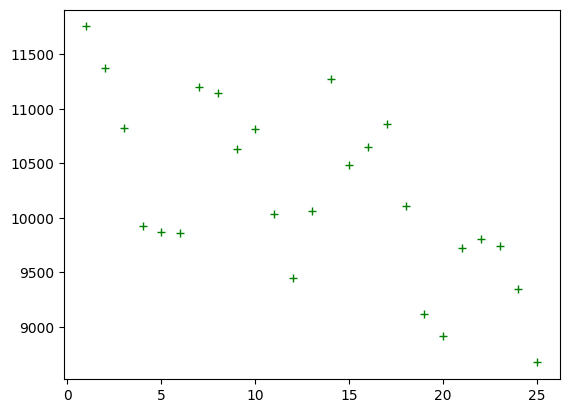

In [17]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(dd,cc,'g+')

In [18]:
def mutation(population):
  mutated = []
  for pop in population:
    ind=[0,1,2,3,4,5]
    i=random.choice(ind)
    new_pop=list(pop)
    new_pop[i] = new_pop[i]+random.random()*10-5
    mutated.append(new_pop)
  return mutated

def cross_over(population):
  ind=[0,1,2,3,4]
  i=random.choice(ind)
  return [population[0][:i+1]+population[1][i+1:],population[1][:i+1]+population[0][i+1:]]

def fitness(param,n):
  a = param[0]
  b = param[1]
  c = param[2]
  d = param[3]
  e = param[4]
  f = param[5]
  xs = dd
  ys_hat = np.array([a*x**5+b*x**4+c*x**3+d*x**2+e*x+f for x in xs])
  ys_actual = cc
  return (ys_hat-ys_actual).dot((ys_hat-ys_actual).T)

def selection(population,n):
  unique_pop = []
  for pop in population:
    if pop not in unique_pop:
      unique_pop.append(pop)
  population = unique_pop
  find_fitness = [(fitness(pop,n),pop) for pop in population]
  find_fitness.sort()
  # print(find_fitness)
  return find_fitness[0],[p for f,p in find_fitness[:2]]

def is_better(p1,p2):
  if len(p2) == 0 or p1[0] <= p2[0]:
    return True
  return False

def show_pop(population):
  for pop in population:
    print(pop)

In [19]:
import random
n = 6

population = [[random.random() for i in range(n)]]
population += [[random.random() for i in range(n)]]
print(population)
mutated = mutation(population)
print(mutated)
crossovered = cross_over(population)
print(crossovered)

[[0.24502033370240284, 0.8009350205562489, 0.04938917152186317, 0.4229488291651258, 0.5601731846392372, 0.9214027642759731], [0.3575944861048378, 0.11024957268917002, 0.46811897081011755, 0.309375959993061, 0.33375793970787615, 0.29974112795088836]]
[[2.3431335251979846, 0.8009350205562489, 0.04938917152186317, 0.4229488291651258, 0.5601731846392372, 0.9214027642759731], [0.3575944861048378, -3.738086500778734, 0.46811897081011755, 0.309375959993061, 0.33375793970787615, 0.29974112795088836]]
[[0.24502033370240284, 0.8009350205562489, 0.04938917152186317, 0.309375959993061, 0.33375793970787615, 0.29974112795088836], [0.3575944861048378, 0.11024957268917002, 0.46811897081011755, 0.4229488291651258, 0.5601731846392372, 0.9214027642759731]]


In [20]:
n=6
population = [[random.random() for i in range(n)]]
population += [[random.random() for i in range(n)]]

print('Start')
print(population)
print('=========')
best_found = tuple()
for i in range(500000):
  mutated = mutation(population)
  cross_overed = cross_over(population)
  best_pop,population = selection(population+mutated+cross_overed,n)
  if is_better(best_pop,best_found):
    best_found = best_pop
  # show_pop(population)
  if fitness(best_found[1],n) <= 1e-3:
    print('Found at generation',i)
    break
  if i % 1000 == 0:
    print(i,best_found)
    print()
print('=====')
print(best_found)
print()

Start
[[0.7889885500586407, 0.29347915021338344, 0.5222247607713268, 0.49067660418119896, 0.4332747795629863, 0.3368236652950244], [0.5515145526815782, 0.3720485961828506, 0.003619015711670337, 0.946674418768678, 0.6707722376498164, 0.7586404636916492]]
0 (85745106203654.28, [0.5515145526815782, 0.3720485961828506, 0.003619015711670337, 0.946674418768678, 0.6707722376498164, 0.7586404636916492])

1000 (1122965249.673564, [-0.029224061851082617, 0.952878710410606, -6.348814388078798, 2.4720950326172577, 353.7997217570959, 268.5059181176111])

2000 (965570085.7759403, [-0.029224061851082617, 0.952878710410606, -6.443604657496367, -12.643065561067477, 696.1860747169382, 515.041914936169])

3000 (894314212.4674603, [-0.029224061851082617, 0.9540214542736791, -6.3897596575577165, -25.404442031924077, 894.5985157166306, 825.5987617378596])

4000 (853931179.4832935, [-0.029224061851082617, 0.9540214542736791, -6.2989906989242135, -29.869690284735057, 922.9608944071437, 1194.4371646332231])

5

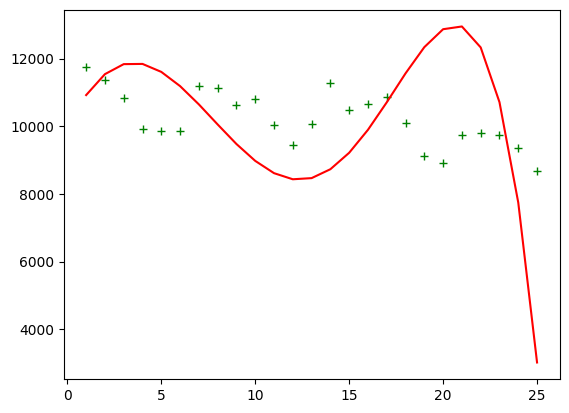

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def f(param):
  a = param[0]
  b = param[1]
  c = param[2]
  d = param[3]
  e = param[4]
  f = param[5]
  xs = dd
  ys_hat = np.array([a*x**5+b*x**4+c*x**3+d*x**2+e*x+f for x in xs])
  return ys_hat

plt.plot(dd,cc,'g+')
plt.plot(dd,f(best_found[1]),'r')